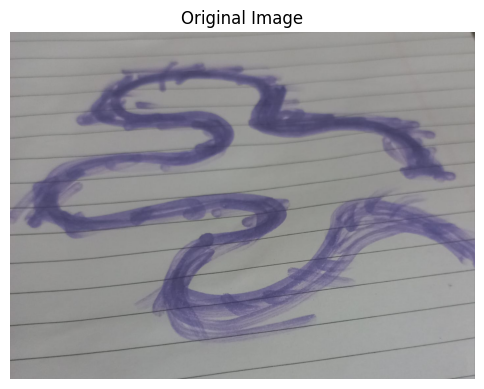

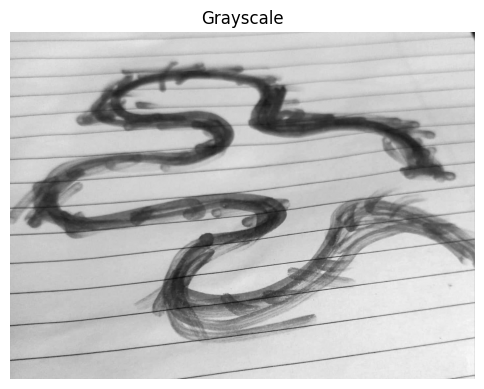

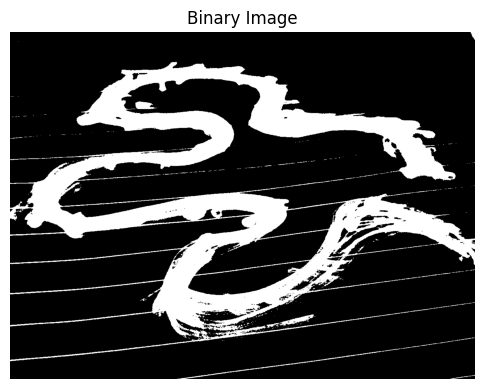

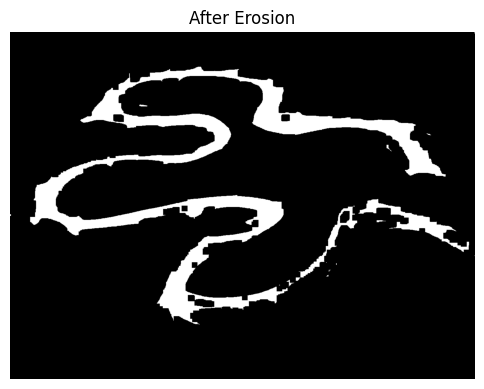

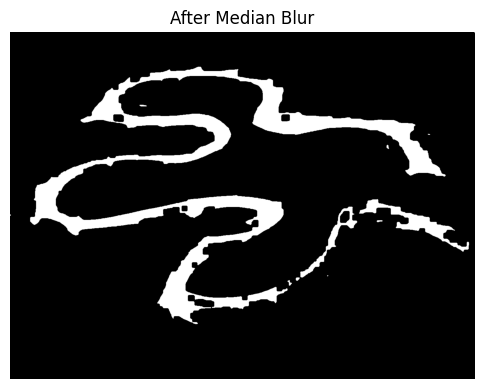

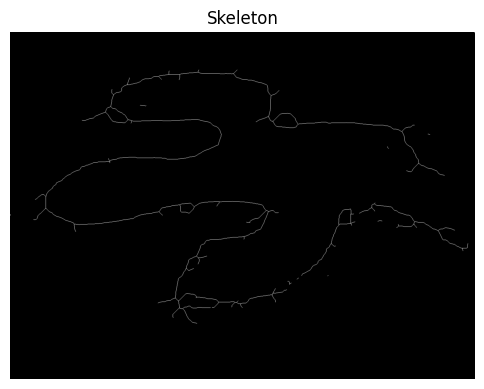

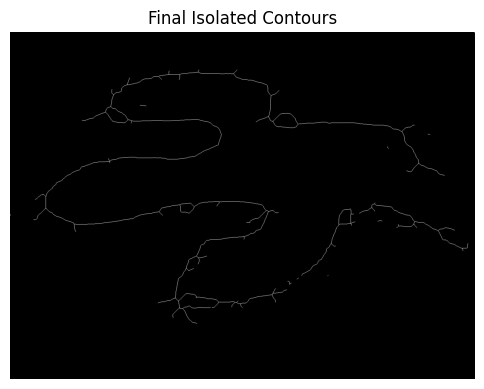

Contour coordinates saved to 'contour_paths.csv'


In [5]:
import cv2
import numpy as np
import requests
from skimage.morphology import skeletonize
from skimage import measure
import matplotlib.pyplot as plt
import pandas as pd

# Help function
def show_image(title, img, cmap=None):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Input image
file_id = '1iHhNACcRiAdoUrOpa_qM7EHe7XwTmOVc'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
response = requests.get(url)
image_data = np.frombuffer(response.content, np.uint8)
image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
show_image("Original Image", image)

# grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image("Grayscale", gray, cmap='gray')

# Binarize
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_image("Binary Image", binary, cmap='gray')

# Erode
kernel = np.ones((3, 3), np.uint8)
morph = cv2.erode(binary, kernel, iterations=8)
show_image("After Erosion", morph, cmap='gray')

# Apply median blur
blurred = cv2.medianBlur(morph, 5)
show_image("After Median Blur", blurred, cmap='gray')

# Skeletonize
skeleton = skeletonize(blurred // 255).astype(np.uint8) * 255
show_image("Skeleton", skeleton, cmap='gray')

# Find contours from the skeleton
contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
contour_only = np.zeros_like(skeleton)
cv2.drawContours(contour_only, contours, -1, 255, 1)
show_image("Final Isolated Contours", contour_only, cmap='gray')

# Path
all_points = []
for contour in contours:
    for point in contour:
        x, y = point[0]
        all_points.append({'x': x, 'y': y})

df = pd.DataFrame(all_points)
df.to_csv("contour_paths.csv", index=False)
print("Contour coordinates saved to 'contour_paths.csv'")
